In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

df =pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


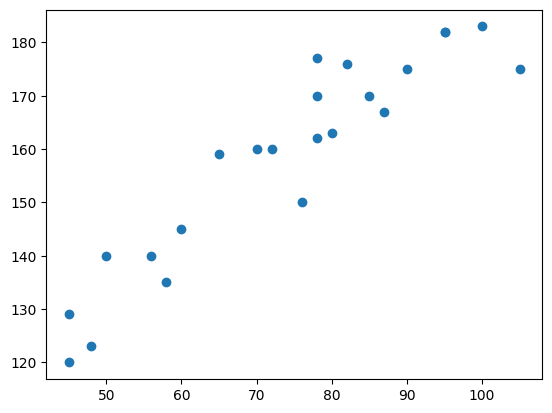

In [2]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel='weight'
plt.ylabel='height'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


## **Divede the dataset into Dependent and independent features**



In [8]:
x=df[['Weight']] # indepemdent Feature 
y=df['Height'] # depemdent Feature 

In [10]:
x.shape,y.shape

((23, 1), (23,))

## **Further Divede the dataset into train and test data set**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
X_train.shape,X_test.shape # so these are training datapoint which is used to train the model , and testing data point which is used to test the model ,basically this is the inout feature 

((18, 1), (5, 1))

In [18]:
y_train.shape,y_test.shape # and this is gone be the  the output of the model , because this is the dependent feature 

((18,), (5,))

# **Stander scaling on the train and test data : to reduce the unit values to make the same scale of data the convergen optimize faster and get close to global minima faster**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\SHIV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


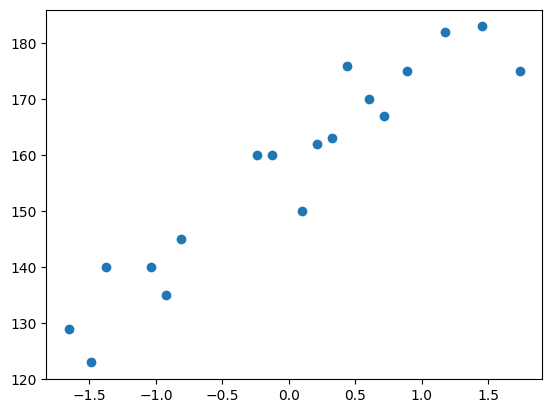

In [23]:
plt.scatter(X_train,y_train)

# **MODEL Training**

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
regresser =LinearRegression()

In [27]:
## traing the train data 
regresser.fit(X_train,y_train)

LinearRegression()

In [29]:
regresser.intercept_

85.96709053063559

In [30]:
regresser.coef_

array([0.9630459])

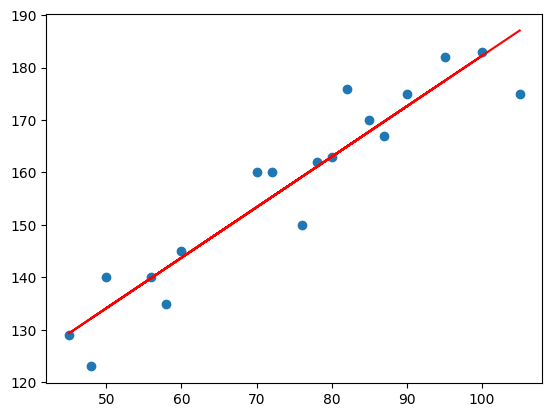

In [34]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regresser.predict(X_train),'r')

# Prediction of train data 
1. predicted height output = intercept+coef_(wieghts)
2. y_pred_train = 157.5 + 17.03(X_train)

# Prediction of data 
1. Predicted height output = intercept+coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)


## **Prediction for the test data** 

In [35]:
y_pred_test =regresser.predict(X_test)

In [36]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [37]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# **Performance Metrics (MAE), (MSE), (RMSE)**

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [40]:
print(mse)
print(mae)
print(rmse)

109.77592599051658
9.822657814519232
10.477400726827078


## **Acurracy of the model R squared and adjested r squared**

**Formula**

**R^2= 1-SSR/SST**

* R^2 = coefficant of determination , or slope 
* SSR = sum of squares residuals 
* SST = total sum of squares

In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

## **Adjusted r squared** 
where :
* R2 : The R2 of the model 
* n : The number of observation
* k : The number of predector variable


In [43]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252